## Problem Statement:-
### Design a linear regression for first 20 countries with Corruption Perception Index(Y) and GiniIndex(X). What is the change in the corruption perception index for every one unit increase in Gini index?

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
CPI_df = pd.read_csv(r'C:\Users\avina\OneDrive\Desktop\Data\Global Corruption Data set\merged_cpi_data.csv')

In [4]:
CPI_df.head(10)

,Year,Country,CPI Score,Rank,Number of Sources,Minimum score,Maximum score,Standard Error,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),ADB,AfDB,BF_SGI,BF_TI,EIU,FH,GI,IMD,PERC,PRS,TI,VDP,WB,WEF,WJP,ISO3,Region,WB Code,OECD,G20,BRICS,EU,Arab states,IFS Code
0,2010,Denmark,93.0,1,6,89.0,95.0,2.0,94.0,91.0,NaN,NaN,NaN,NaN,8.9,NaN,9.2,9.5,NaN,NaN,NaN,NaN,NaN,9.2,NaN,DNK,WE/EU,DNK,y,NaN,NaN,y,NaN,128.0
1,2010,New Zealand,93.0,1,6,89.0,95.0,2.0,95.0,92.0,NaN,NaN,NaN,NaN,8.9,NaN,9.2,9.5,NaN,NaN,NaN,NaN,NaN,9.5,NaN,NZL,AP,NZL,y,NaN,NaN,NaN,NaN,196.0
2,2010,Singapore,93.0,1,9,89.0,95.0,2.0,94.0,92.0,NaN,NaN,NaN,9.3,8.9,NaN,9.2,9.2,9.4,NaN,NaN,NaN,NaN,9.5,NaN,SGP,AP,SGP,NaN,NaN,NaN,NaN,NaN,576.0
3,2010,Finland,92.0,4,6,89.0,95.0,2.0,93.0,91.0,NaN,NaN,NaN,NaN,8.9,NaN,9.2,9.4,NaN,NaN,NaN,NaN,NaN,9.1,NaN,FIN,WE/EU,FIN,y,NaN,NaN,y,NaN,172.0
4,2010,Sweden,92.0,4,6,89.0,95.0,2.0,94.0,91.0,NaN,NaN,NaN,NaN,8.9,NaN,9.2,9.3,NaN,NaN,NaN,NaN,NaN,9.4,NaN,SWE,WE/EU,SWE,y,NaN,NaN,y,NaN,144.0
5,2010,Canada,89.0,6,6,84.0,92.0,3.0,90.0,87.0,NaN,NaN,NaN,NaN,8.9,NaN,9.2,8.8,NaN,NaN,NaN,NaN,NaN,8.9,NaN,CAN,AME,CAN,y,y,NaN,NaN,NaN,156.0
6,2010,Netherlands,88.0,7,6,85.0,92.0,3.0,90.0,87.0,NaN,NaN,NaN,NaN,8.9,NaN,9.2,8.9,NaN,NaN,NaN,NaN,NaN,8.5,NaN,NLD,WE/EU,NLD,y,NaN,NaN,y,NaN,138.0
7,2010,Australia,87.0,8,8,75.0,92.0,6.0,90.0,83.0,NaN,NaN,NaN,NaN,8.9,NaN,9.2,9.1,8.9,NaN,NaN,NaN,NaN,8.3,NaN,AUS,AP,AUS,y,y,NaN,NaN,NaN,193.0
8,2010,Switzerland,87.0,8,6,74.0,91.0,7.0,91.0,83.0,NaN,NaN,NaN,NaN,8.9,NaN,7.4,9.1,NaN,NaN,NaN,NaN,NaN,9.0,NaN,CHE,WE/EU,CHE,y,NaN,NaN,NaN,NaN,146.0
9,2010,Norway,86.0,10,6,74.0,93.0,7.0,90.0,81.0,NaN,NaN,NaN,NaN,8.9,NaN,7.4,8.4,NaN,NaN,NaN,NaN,NaN,9.3,NaN,NOR,WE/EU,NOR,y,NaN,NaN,NaN,NaN,142.0


In [5]:
Gini_df = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\Data\data_csv.csv")

In [6]:
Gini_df

,Country Name,Country Code,Year,Value
0,Albania,ALB,1996,27.0
1,Albania,ALB,2002,31.7
2,Albania,ALB,2005,30.6
3,Albania,ALB,2008,30.0
4,Albania,ALB,2012,29.0
...,...,...,...,...
1373,Zambia,ZMB,2004,54.3
1374,Zambia,ZMB,2006,54.6
1375,Zambia,ZMB,2010,55.6
1376,Zambia,ZMB,2015,57.1


In [7]:
print("Shape of the CPI data:{}".format(CPI_df.shape))

Shape of the CPI data:(1772, 34)


In [8]:
print("Shape of the Gini Index data:{}".format(Gini_df.shape))

Shape of the Gini Index data:(1378, 4)


In [9]:
CPI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 34 columns):
Year                                      1772 non-null int64
Country                                   1772 non-null object
CPI Score                                 1772 non-null float64
Rank                                      1772 non-null int64
Number of Sources                         1772 non-null int64
Minimum score                             1233 non-null float64
Maximum score                             1233 non-null float64
Standard Error                            1772 non-null float64
90% Confidence Interval (Higher bound)    1772 non-null float64
90% Confidence Interval (Lower bound)     1772 non-null float64
ADB                                       46 non-null float64
AfDB                                      690 non-null float64
BF_SGI                                    630 non-null float64
BF_TI                                     1389 non-null float64
EIU     

In [10]:
#analyzing our missing values from the given dataset
total_CPI = CPI_df.isnull().sum()
percent_CPI = (CPI_df.isnull().sum()/CPI_df.shape[0])*100
missing_CPI = pd.concat([total_CPI,percent_CPI],axis=1,keys = ['Total_for_CPI','%tage_for_CPI'])
missing_CPI

,Total_for_CPI,%tage_for_CPI
Year,0,0.000000
Country,0,0.000000
CPI Score,0,0.000000
Rank,0,0.000000
Number of Sources,0,0.000000
Minimum score,539,30.417607
Maximum score,539,30.417607
Standard Error,0,0.000000
90% Confidence Interval (Higher bound),0,0.000000
90% Confidence Interval (Lower bound),0,0.000000


In [11]:
#finding about the feature that have more than 30% missing values
features = [features for features in CPI_df.columns if (CPI_df[features].isnull().sum()/1772)>0.3]
features

['Minimum score',
 'Maximum score',
 'ADB',
 'AfDB',
 'BF_SGI',
 'FH',
 'IMD',
 'PERC',
 'TI',
 'VDP',
 'WB',
 'WJP',
 'OECD',
 'G20',
 'BRICS',
 'EU',
 'Arab states']

In [12]:
#dropping features with more than 30% missing values
CPI_df = CPI_df.drop(features,axis=1)

In [13]:
CPI_df.head()

,Year,Country,CPI Score,Rank,Number of Sources,Standard Error,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),BF_TI,EIU,GI,PRS,WEF,ISO3,Region,WB Code,IFS Code
0,2010,Denmark,93.0,1,6,2.0,94.0,91.0,NaN,8.9,9.2,NaN,9.2,DNK,WE/EU,DNK,128.0
1,2010,New Zealand,93.0,1,6,2.0,95.0,92.0,NaN,8.9,9.2,NaN,9.5,NZL,AP,NZL,196.0
2,2010,Singapore,93.0,1,9,2.0,94.0,92.0,9.3,8.9,9.2,NaN,9.5,SGP,AP,SGP,576.0
3,2010,Finland,92.0,4,6,2.0,93.0,91.0,NaN,8.9,9.2,NaN,9.1,FIN,WE/EU,FIN,172.0
4,2010,Sweden,92.0,4,6,2.0,94.0,91.0,NaN,8.9,9.2,NaN,9.4,SWE,WE/EU,SWE,144.0


In [14]:
#findin the categorical variable which does not have much values
cat_features = [features for features in CPI_df.columns if CPI_df[features].isnull().any() and CPI_df[features].nunique()<25]
cat_features

['Region']

In [15]:
CPI_df.isnull().sum()

Year                                        0
Country                                     0
CPI Score                                   0
Rank                                        0
Number of Sources                           0
Standard Error                              0
90% Confidence Interval (Higher bound)      0
90% Confidence Interval (Lower bound)       0
BF_TI                                     383
EIU                                       369
GI                                          7
PRS                                       443
WEF                                       316
ISO3                                       32
Region                                     10
WB Code                                    23
IFS Code                                   93
dtype: int64

In [16]:
CPI_df.describe()

,Year,CPI Score,Rank,Number of Sources,Standard Error,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),BF_TI,EIU,GI,PRS,WEF,IFS Code
count,1772.000000,1772.000000,1772.000000,1772.000000,1772.000000,1772.00000,1772.000000,1389.000000,1403.000000,1765.000000,1329.000000,1456.000000,1679.000000
mean,2014.499436,42.442799,87.708804,6.558691,3.442531,47.46191,37.454448,27.898296,35.443292,35.270059,37.188650,37.030664,542.410363
std,2.888967,19.805697,50.794655,1.951255,2.233435,20.06050,19.893414,20.326621,25.927395,24.013338,25.119175,25.766790,262.087947
min,2010.000000,8.000000,1.000000,3.000000,0.000000,11.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000
25%,2012.000000,28.000000,44.000000,5.000000,2.120000,32.00000,23.000000,6.595013,19.000000,11.000000,21.000000,17.000000,290.500000
50%,2014.000000,37.000000,87.000000,7.000000,2.840000,42.00000,32.674285,28.000000,37.000000,34.503290,32.000000,35.000000,566.000000
75%,2017.000000,55.000000,130.000000,8.000000,4.000000,62.00000,49.924500,40.000000,54.000000,52.000000,50.000000,53.315595,720.000000
max,2019.000000,94.626810,182.000000,13.000000,20.000000,95.38873,93.783430,79.000000,90.000000,83.256370,100.000000,96.000000,968.000000


In [17]:
#imputing missing values
for features in ('BF_TI','EIU','GI','PRS','WEF','IFS Code'):
    CPI_df[features].fillna(CPI_df[features].mean(),inplace=True)
#CPI_df['BF_TI'] = CPI_df['BF_TI'].fillna(CPI_df['BF_TI'].mean(),inplace = True)    

In [18]:
CPI_df.isnull().sum()

Year                                       0
Country                                    0
CPI Score                                  0
Rank                                       0
Number of Sources                          0
Standard Error                             0
90% Confidence Interval (Higher bound)     0
90% Confidence Interval (Lower bound)      0
BF_TI                                      0
EIU                                        0
GI                                         0
PRS                                        0
WEF                                        0
ISO3                                      32
Region                                    10
WB Code                                   23
IFS Code                                   0
dtype: int64

In [19]:
#imputing missing values
for features in ('BF_TI','EIU','GI','PRS','WEF','IFS Code'):
    CPI_df[features].fillna(CPI_df[features].mean(),inplace=True)

In [20]:
CPI_df.ISO3.isnull().sum()

32

In [21]:
#CPI_df['ISO3'] = CPI_df['ISO3'].fillna(CPI_df.groupby('Country')['ISO3'].transform(lambda x:x.value_counts().index[0]))

In [22]:
CPI_df = CPI_df.dropna()

In [23]:
CPI_df.isnull().sum()

Year                                      0
Country                                   0
CPI Score                                 0
Rank                                      0
Number of Sources                         0
Standard Error                            0
90% Confidence Interval (Higher bound)    0
90% Confidence Interval (Lower bound)     0
BF_TI                                     0
EIU                                       0
GI                                        0
PRS                                       0
WEF                                       0
ISO3                                      0
Region                                    0
WB Code                                   0
IFS Code                                  0
dtype: int64

In [24]:
CPI_df = CPI_df.drop('Rank',axis=1)

In [25]:
#We will check again the skewness and kurtosis of the target variable
print("Skewness of the target variable: {}".format(CPI_df['CPI Score'].skew()))
print("Kurtosis of the target variable: {}".format(CPI_df['CPI Score'].kurt()))

Skewness of the target variable: 0.751120780191618
Kurtosis of the target variable: -0.3219872599780622


We can clearly see that skewness = 0.75 which says its moderately skewed and kurtosis value is very low that is it light-tailed or lack of outliers.

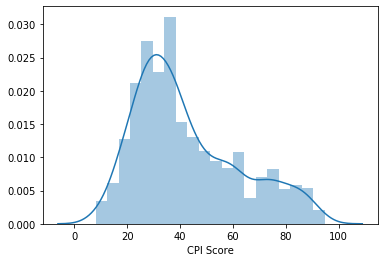

In [26]:
#Lets check the graphical version too, to get this visually.
sns.distplot(CPI_df['CPI Score'])

To get rid of this skewness, we will perform log-transformation.

In [27]:
#applying log transformation to our target variable
CPI_df['CPI Score'] = np.log(CPI_df['CPI Score'])

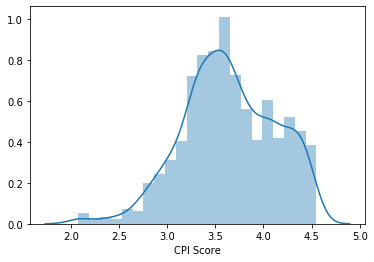

In [28]:
#Checking out the distrivution our our target variable
sns.distplot(CPI_df['CPI Score'])

In [29]:
CPI_df.corr()

,Year,CPI Score,Number of Sources,Standard Error,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),BF_TI,EIU,GI,PRS,WEF,IFS Code
Year,1.000000,0.058566,0.108704,-0.221510,0.050216,0.034141,0.432035,0.411639,0.456645,0.277792,0.429735,-0.004318
CPI Score,0.058566,1.000000,0.236729,0.061220,0.961290,0.945566,0.345657,0.564382,0.674254,0.625195,0.531330,-0.369357
Number of Sources,0.108704,0.236729,1.000000,-0.273790,0.155124,0.236863,0.246662,0.123712,0.104386,0.135746,0.054440,0.073893
Standard Error,-0.221510,0.061220,-0.273790,1.000000,0.114353,-0.091594,-0.158021,-0.184344,-0.140747,-0.031193,-0.105503,0.072996
90% Confidence Interval (Higher bound),0.050216,0.961290,0.155124,0.114353,1.000000,0.965688,0.272134,0.598638,0.681756,0.655122,0.582447,-0.425377
90% Confidence Interval (Lower bound),0.034141,0.945566,0.236863,-0.091594,0.965688,1.000000,0.265175,0.602621,0.655290,0.669024,0.549437,-0.447593
BF_TI,0.432035,0.345657,0.246662,-0.158021,0.272134,0.265175,1.000000,0.380016,0.472563,0.262401,0.385445,0.130196
EIU,0.411639,0.564382,0.123712,-0.184344,0.598638,0.602621,0.380016,1.000000,0.816019,0.771221,0.771189,-0.276363
GI,0.456645,0.674254,0.104386,-0.140747,0.681756,0.655290,0.472563,0.816019,1.000000,0.717698,0.784068,-0.262921
PRS,0.277792,0.625195,0.135746,-0.031193,0.655122,0.669024,0.262401,0.771221,0.717698,1.000000,0.719196,-0.361085


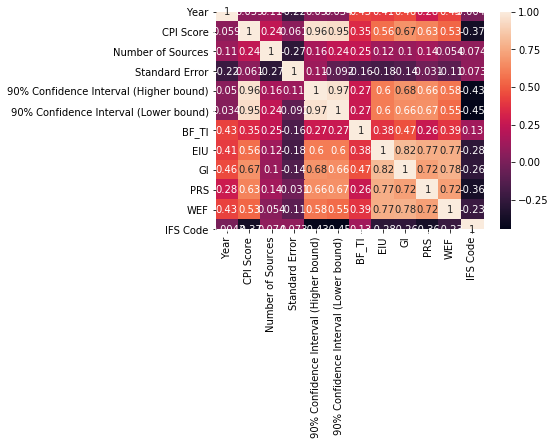

In [30]:
#checking on the correlation of our predictors w.r.t the target variable
sns.heatmap(CPI_df.corr(),annot=True)

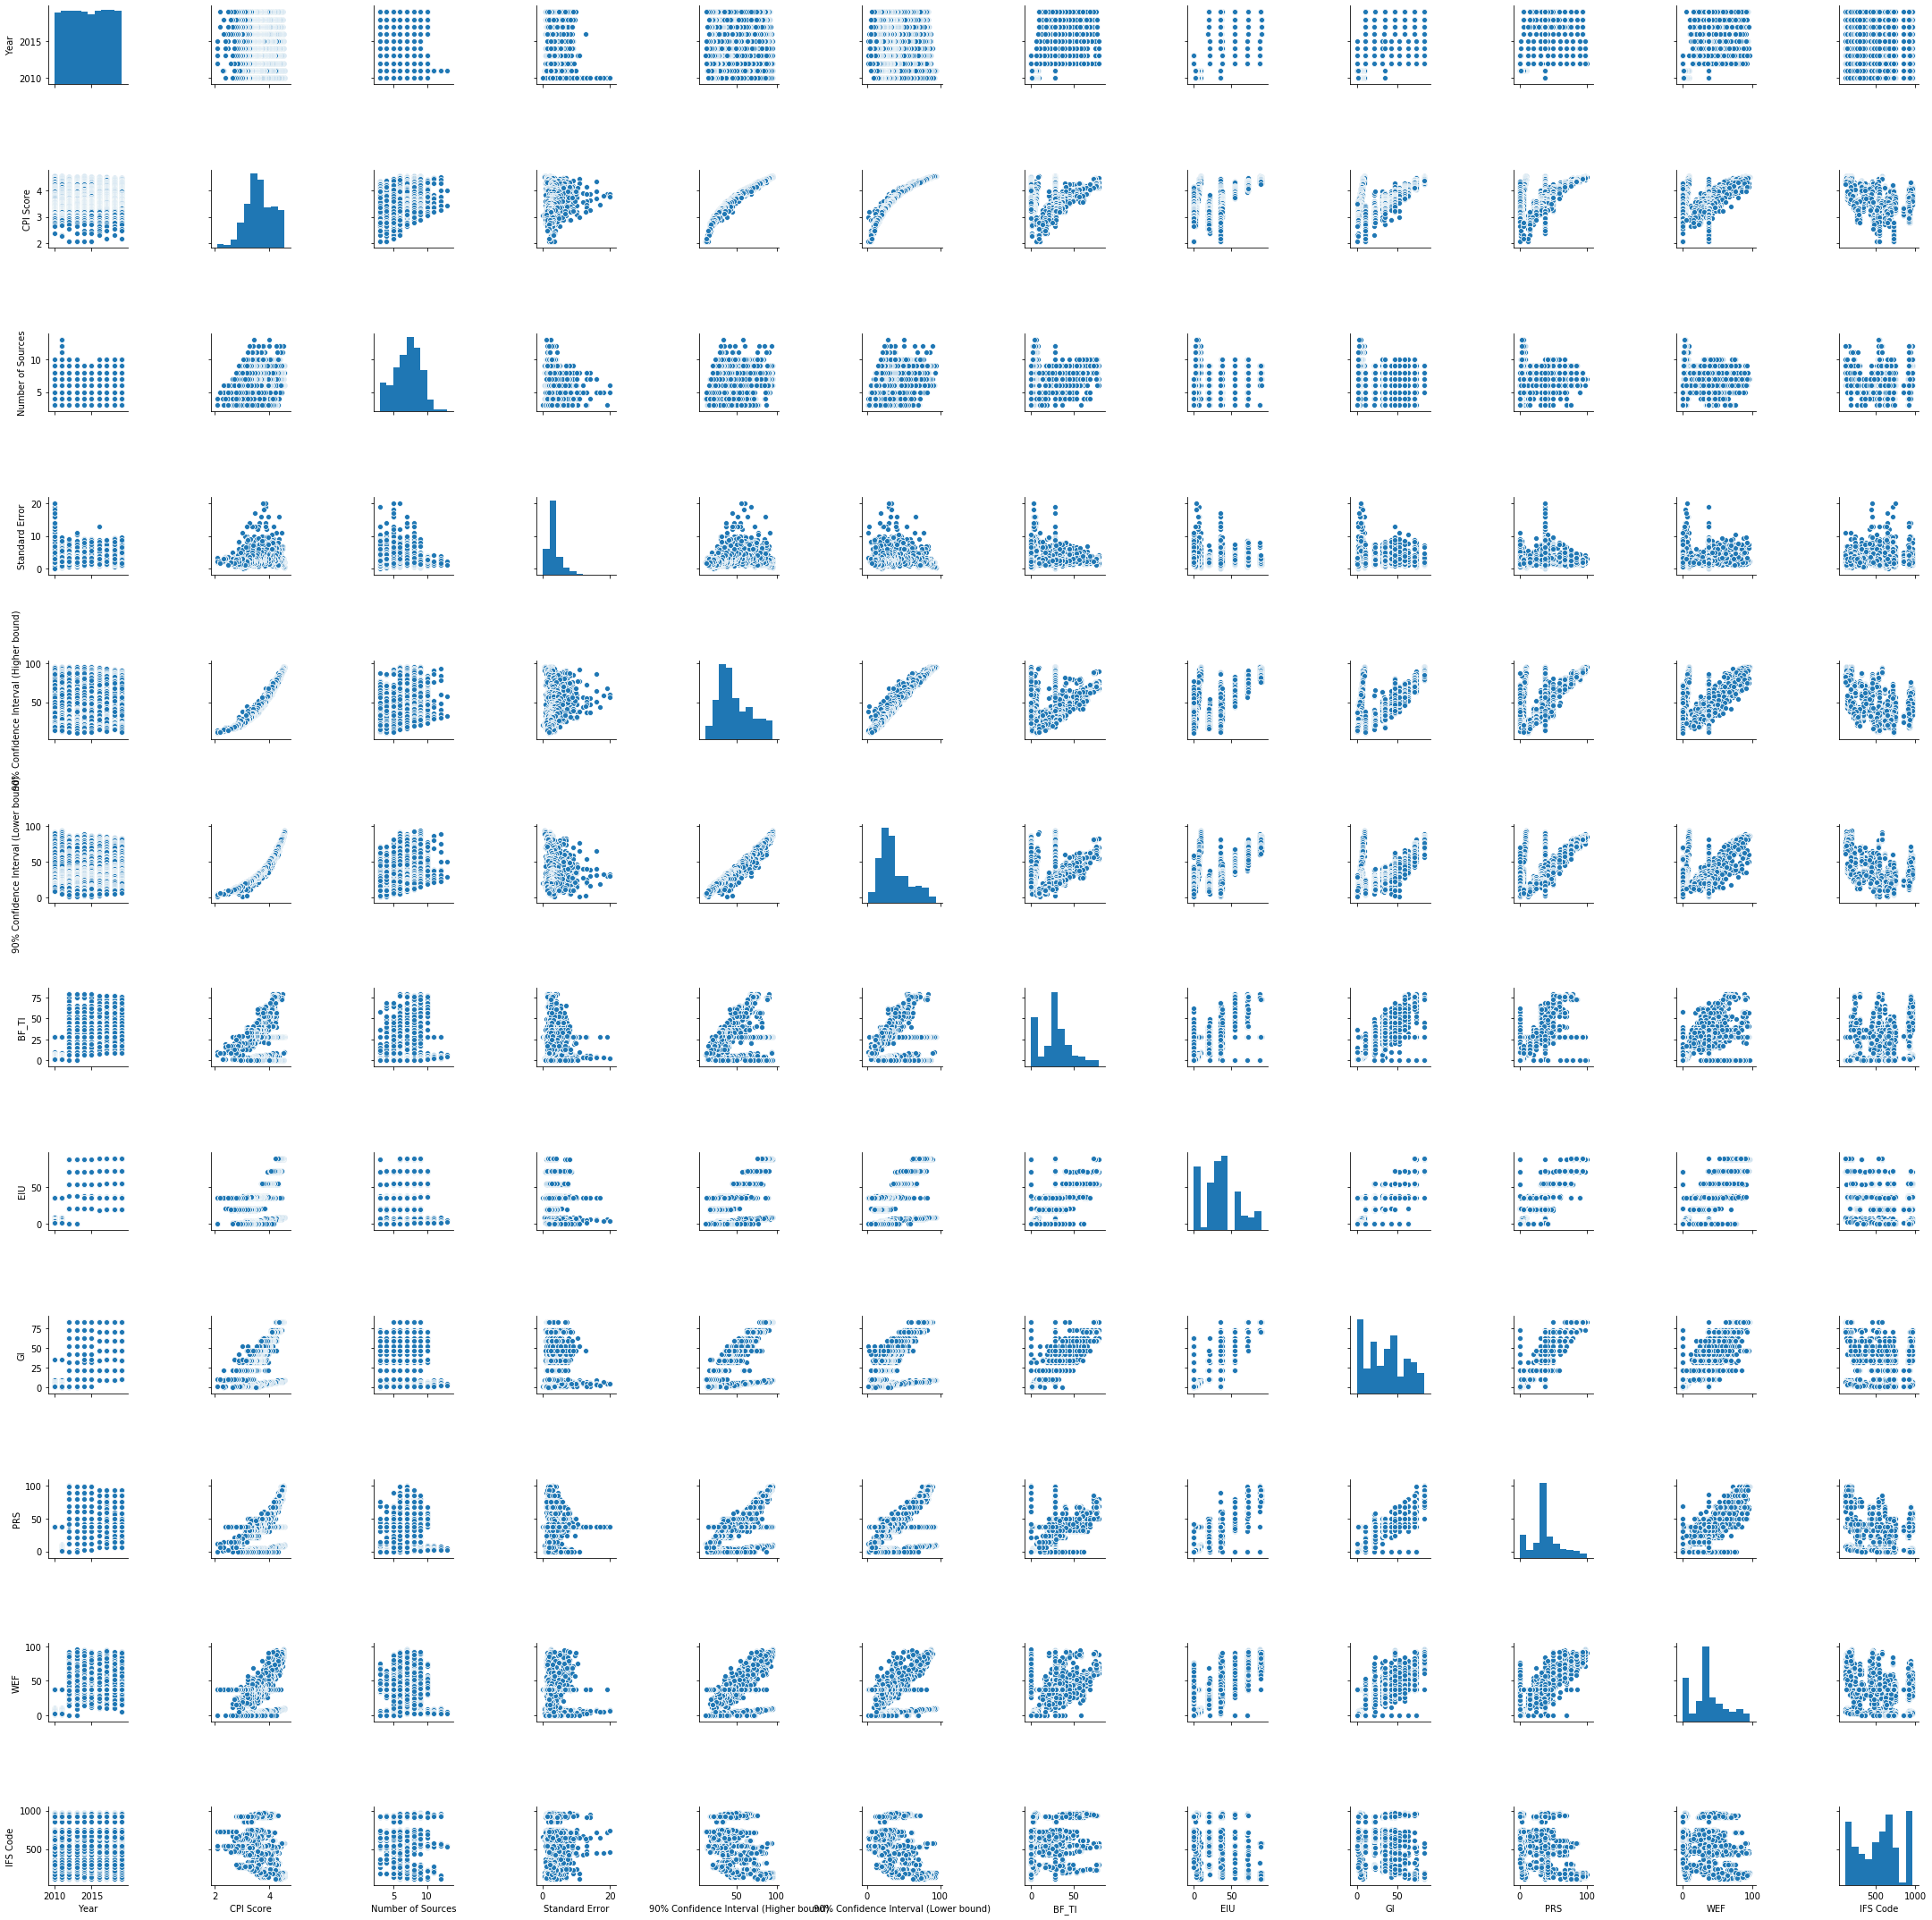

In [31]:
sns.pairplot(data = CPI_df)

In [32]:
#dropping those columns which do not explain much variance in our target variable
CPI_df = CPI_df.drop(['Number of Sources','Standard Error','BF_TI','EIU','IFS Code','Year'],axis=1)

In [33]:
CPI_df

,Country,CPI Score,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),GI,PRS,WEF,ISO3,Region,WB Code
0,Denmark,4.532599,94.00000,91.000000,9.20000,37.188650,9.200000,DNK,WE/EU,DNK
1,New Zealand,4.532599,95.00000,92.000000,9.20000,37.188650,9.500000,NZL,AP,NZL
2,Singapore,4.532599,94.00000,92.000000,9.20000,37.188650,9.500000,SGP,AP,SGP
3,Finland,4.521789,93.00000,91.000000,9.20000,37.188650,9.100000,FIN,WE/EU,FIN
4,Sweden,4.521789,94.00000,91.000000,9.20000,37.188650,9.400000,SWE,WE/EU,SWE
...,...,...,...,...,...,...,...,...,...,...
1767,Venezuela,2.772589,19.36013,12.639870,10.21805,15.001060,15.568670,VEN,AME,VEN
1768,Yemen,2.708050,18.09303,11.906970,10.21805,15.001060,23.460010,YEM,MENA,YEM
1769,Syria,2.564949,16.15128,9.848716,10.21805,15.001060,37.030664,SYR,MENA,SYR
1770,South Sudan,2.484907,14.07286,9.927135,10.21805,37.188650,37.030664,SSD,SSA,SSD


In [34]:
#finding out the distinct countries with their sum of CPI and other index from all the designated year
CPI_df1 = CPI_df.groupby('Country')['CPI Score','90% Confidence Interval (Higher bound)','90% Confidence Interval (Lower bound)','GI','PRS','WEF'].mean()

In [35]:
CPI_df1

,CPI Score,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),GI,PRS,WEF
Country,,,,,,
Afghanistan,2.536140,16.189770,9.647464,6.712153,29.750920,29.624531
Albania,3.536574,37.772041,31.143767,29.669765,33.787490,30.478966
Algeria,3.514658,37.466938,30.000373,28.820445,29.216611,26.749898
Angola,2.985906,22.673231,17.442772,15.765545,20.320512,18.222877
Argentina,3.558361,39.262384,31.505394,28.393157,30.833750,22.298480
...,...,...,...,...,...,...
Venezuela,2.903900,21.187475,15.287609,15.640224,14.656704,11.480686
Vietnam,3.454600,36.011974,27.705734,24.292140,36.099519,28.653229
Yemen,2.874559,21.386973,14.762511,12.140224,18.474853,17.406236


In [36]:
type(CPI_df1)

pandas.core.frame.DataFrame

In [37]:
#CPI_df1 = CPI_df1.sort_values(by='CPI Score',ascending=False,inplace=True)

In [38]:
CPI_df1

,CPI Score,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),GI,PRS,WEF
Country,,,,,,
Afghanistan,2.536140,16.189770,9.647464,6.712153,29.750920,29.624531
Albania,3.536574,37.772041,31.143767,29.669765,33.787490,30.478966
Algeria,3.514658,37.466938,30.000373,28.820445,29.216611,26.749898
Angola,2.985906,22.673231,17.442772,15.765545,20.320512,18.222877
Argentina,3.558361,39.262384,31.505394,28.393157,30.833750,22.298480
...,...,...,...,...,...,...
Venezuela,2.903900,21.187475,15.287609,15.640224,14.656704,11.480686
Vietnam,3.454600,36.011974,27.705734,24.292140,36.099519,28.653229
Yemen,2.874559,21.386973,14.762511,12.140224,18.474853,17.406236


In [39]:
#sorting values to ascending order to extract the best 20 countries with hightest CPI score
CPI_df1=CPI_df1.sort_values('CPI Score',ascending=False)
CPI_df1

,CPI Score,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),GI,PRS,WEF
Country,,,,,,
Denmark,4.503876,93.693912,86.980182,68.277440,81.004513,69.378053
New Zealand,4.503519,93.813858,87.103358,68.277440,81.104513,74.804400
Finland,4.487068,92.200435,85.714589,68.277440,81.336057,75.224920
Sweden,4.476820,91.150047,84.846965,68.277440,80.151308,66.197100
Singapore,4.459144,89.501800,83.401203,68.277440,68.595260,73.437729
...,...,...,...,...,...,...
Sudan,2.632474,18.447505,9.685246,13.605545,8.085824,29.624531
South Sudan,2.569688,16.296123,9.846734,15.822595,31.875986,31.740569
Afghanistan,2.536140,16.189770,9.647464,6.712153,29.750920,29.624531


In [40]:
CPI_df2 = CPI_df1.head(40)

In [41]:
CPI_df2

,CPI Score,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),GI,PRS,WEF
Country,,,,,,
Denmark,4.503876,93.693912,86.980182,68.277440,81.004513,69.378053
New Zealand,4.503519,93.813858,87.103358,68.277440,81.104513,74.804400
Finland,4.487068,92.200435,85.714589,68.277440,81.336057,75.224920
Sweden,4.476820,91.150047,84.846965,68.277440,80.151308,66.197100
Singapore,4.459144,89.501800,83.401203,68.277440,68.595260,73.437729
Switzerland,4.453143,89.387109,82.260096,63.918724,74.095260,69.584633
Norway,4.452865,89.068286,82.509562,68.097440,79.419770,64.640472
Netherlands,4.430367,87.222006,80.941650,68.277440,74.180429,67.665517
Canada,4.414162,85.783522,79.360093,65.854049,74.180429,62.333822


In [42]:
CPI_df2 = CPI_df2.reset_index(level = 0,drop=False)

In [43]:
type(CPI_df2)

pandas.core.frame.DataFrame

In [44]:
CPI_df2

,Country,CPI Score,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),GI,PRS,WEF
0,Denmark,4.503876,93.693912,86.980182,68.277440,81.004513,69.378053
1,New Zealand,4.503519,93.813858,87.103358,68.277440,81.104513,74.804400
2,Finland,4.487068,92.200435,85.714589,68.277440,81.336057,75.224920
3,Sweden,4.476820,91.150047,84.846965,68.277440,80.151308,66.197100
4,Singapore,4.459144,89.501800,83.401203,68.277440,68.595260,73.437729
5,Switzerland,4.453143,89.387109,82.260096,63.918724,74.095260,69.584633
6,Norway,4.452865,89.068286,82.509562,68.097440,79.419770,64.640472
7,Netherlands,4.430367,87.222006,80.941650,68.277440,74.180429,67.665517
8,Canada,4.414162,85.783522,79.360093,65.854049,74.180429,62.333822
9,Luxembourg,4.407720,86.030594,78.045387,65.918724,74.180429,71.456457


In [45]:
#finding the distinct countries with their sum of GINI index values from all the years
Gini_df1 = Gini_df.groupby('Country Name')['Value'].mean()

In [46]:
Gini_df1

Country Name
Albania               29.660000
Algeria               34.366667
Angola                42.700000
Argentina             46.339286
Armenia               32.176471
                        ...    
Vietnam               36.222222
West Bank and Gaza    34.642857
Yemen, Rep.           35.466667
Zambia                52.688889
Zimbabwe              43.200000
Name: Value, Length: 164, dtype: float64

In [47]:
Gini_df1 = pd.DataFrame(Gini_df1)

In [48]:
Gini_df1

,Value
Country Name,
Albania,29.660000
Algeria,34.366667
Angola,42.700000
Argentina,46.339286
Armenia,32.176471
...,...
Vietnam,36.222222
West Bank and Gaza,34.642857
"Yemen, Rep.",35.466667


In [49]:
Gini_df1 = Gini_df1.reset_index(level = 0,drop=False)

In [50]:
Gini_df1.rename(columns = {'Country Name':'Country'},inplace=True)

In [51]:
Gini_df1

,Country,Value
0,Albania,29.660000
1,Algeria,34.366667
2,Angola,42.700000
3,Argentina,46.339286
4,Armenia,32.176471
...,...,...
159,Vietnam,36.222222
160,West Bank and Gaza,34.642857
161,"Yemen, Rep.",35.466667
162,Zambia,52.688889


In [52]:
#performing inner join to both the dataset in order to find the final dataset
final_df = CPI_df2.merge(Gini_df1,on='Country',how='inner')
final_df

,Country,CPI Score,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),GI,PRS,WEF,Value
0,Denmark,4.503876,93.693912,86.980182,68.277440,81.004513,69.378053,26.700000
1,Finland,4.487068,92.200435,85.714589,68.277440,81.336057,75.224920,27.561538
2,Sweden,4.476820,91.150047,84.846965,68.277440,80.151308,66.197100,26.923077
3,Switzerland,4.453143,89.387109,82.260096,63.918724,74.095260,69.584633,32.866667
4,Norway,4.452865,89.068286,82.509562,68.097440,79.419770,64.640472,27.223077
5,Netherlands,4.430367,87.222006,80.941650,68.277440,74.180429,67.665517,28.725000
6,Canada,4.414162,85.783522,79.360093,65.854049,74.180429,62.333822,32.672727
7,Luxembourg,4.407720,86.030594,78.045387,65.918724,74.180429,71.456457,31.425000
8,Australia,4.393769,83.055260,78.817964,64.654049,67.609549,65.234460,33.337500
9,Germany,4.380023,83.896711,75.909754,63.918724,74.180429,58.126392,30.363636


In [53]:
df = final_df.head(20)

In [54]:
df

,Country,CPI Score,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),GI,PRS,WEF,Value
0,Denmark,4.503876,93.693912,86.980182,68.277440,81.004513,69.378053,26.700000
1,Finland,4.487068,92.200435,85.714589,68.277440,81.336057,75.224920,27.561538
2,Sweden,4.476820,91.150047,84.846965,68.277440,80.151308,66.197100,26.923077
3,Switzerland,4.453143,89.387109,82.260096,63.918724,74.095260,69.584633,32.866667
4,Norway,4.452865,89.068286,82.509562,68.097440,79.419770,64.640472,27.223077
5,Netherlands,4.430367,87.222006,80.941650,68.277440,74.180429,67.665517,28.725000
6,Canada,4.414162,85.783522,79.360093,65.854049,74.180429,62.333822,32.672727
7,Luxembourg,4.407720,86.030594,78.045387,65.918724,74.180429,71.456457,31.425000
8,Australia,4.393769,83.055260,78.817964,64.654049,67.609549,65.234460,33.337500
9,Germany,4.380023,83.896711,75.909754,63.918724,74.180429,58.126392,30.363636


In [55]:
df.corr()

,CPI Score,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),GI,PRS,WEF,Value
CPI Score,1.000000,0.989474,0.989125,0.940172,0.934853,0.731082,-0.614407
90% Confidence Interval (Higher bound),0.989474,1.000000,0.960418,0.931485,0.932792,0.780758,-0.635366
90% Confidence Interval (Lower bound),0.989125,0.960418,1.000000,0.922579,0.915592,0.671501,-0.571299
GI,0.940172,0.931485,0.922579,1.000000,0.903996,0.676741,-0.707830
PRS,0.934853,0.932792,0.915592,0.903996,1.000000,0.603108,-0.564153
WEF,0.731082,0.780758,0.671501,0.676741,0.603108,1.000000,-0.490832
Value,-0.614407,-0.635366,-0.571299,-0.707830,-0.564153,-0.490832,1.000000


In [56]:
df.columns

Index(['Country', 'CPI Score', '90% Confidence Interval (Higher bound)',
       '90% Confidence Interval (Lower bound)', 'GI', 'PRS', 'WEF', 'Value'],
      dtype='object')

## Scaling our data

In [57]:
num_vars = ['CPI Score', '90% Confidence Interval (Higher bound)',
       '90% Confidence Interval (Lower bound)', 'GI', 'PRS', 'WEF', 'Value']

In [58]:

from sklearn.preprocessing import MinMaxScaler

#Instantiate an object
Scaler = MinMaxScaler()


#fit on data
df[num_vars] = Scaler.fit_transform(df[num_vars])
df.head()

,Country,CPI Score,90% Confidence Interval (Higher bound),90% Confidence Interval (Lower bound),GI,PRS,WEF,Value
0,Denmark,1.000000,1.000000,1.000000,1.000000,0.987428,0.704182,0.000000
1,Finland,0.938792,0.929381,0.942939,1.000000,1.000000,1.000000,0.033735
2,Sweden,0.901474,0.879714,0.903821,1.000000,0.955074,0.543244,0.008735
3,Switzerland,0.815252,0.796354,0.787188,0.688379,0.725427,0.714634,0.241466
4,Norway,0.814239,0.781278,0.798435,0.987131,0.927334,0.464488,0.020482


In [59]:
#dropping country because our model is reluctant to object datatypes
df.drop('Country',axis=1,inplace=True)

In [60]:
#X_train,Y_train
Y = df.pop('CPI Score')
X = df

In [61]:
#using sk learn linear regression model to fit our data
from sklearn.linear_model import LinearRegression

In [62]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
#using stats model to build the model for better overview of statistics
import statsmodels.api as sm
#adding a constant variable
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CPI Score   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1606.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           6.97e-18
Time:                        23:10:55   Log-Likelihood:                 61.508
No. Observations:                  20   AIC:                            -109.0
Df Residuals:                      13   BIC:                            -102.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0174      0.013      1.300      0.216      -0.012       0.046
90% Confidence Interval (Higher bound)     0.4876      0.070      6.961      0.000       0.336       0.639
90% Confidence Interval (Lower bound)      0.4770      0.044     10.723      0.000       0.381       0.573
GI                                         0.0292      0.031      0.940      0.364      -0.038       0.096
PRS                                        0.0081      0.042      0.193      0.850      -0.082       0.099
WEF                                       -0.0025      0.023     -0.105      0.918      -0.053       0.048
Value                                     -0.0021      0.021     -0.099      0.923      -0.048       0.044
==============================================================================
Omnibus:                        4.274   Durbin-Watson:                   0.711
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.006
Skew:                          -0.472   Prob(JB):                        0.367
Kurtosis:                       1.769   Cond. No.                         44.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Checking VIF:-
#1.Creating a dataframe that will contains all the names of features variables and their respective VIF
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending =False)
vif

,features,VIF
1,90% Confidence Interval (Higher bound),47.25
2,90% Confidence Interval (Lower bound),19.74
0,const,18.68
4,PRS,12.68
3,GI,11.97
5,WEF,4.68
6,Value,2.49


In [65]:
#fitting the regression model on our target variable
Y_pred = lm.predict(X)

In [66]:
Y_pred

0     1.017407
1     0.955065
2     0.913000
3     0.804854
4     0.814310
5     0.736298
6     0.664395
7     0.640927
8     0.584903
9     0.543371
10    0.523298
11    0.459405
12    0.315037
13    0.305721
14    0.290038
15    0.268238
16    0.133759
17    0.083327
18    0.064160
19    0.017314
dtype: float64

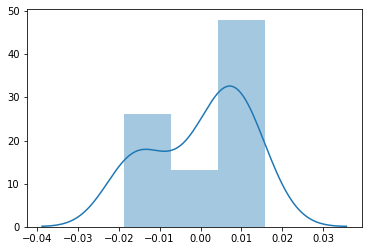

In [67]:
#residual analysis
res = Y - Y_pred
sns.distplot(res)

In [68]:
from sklearn.metrics import r2_score

In [69]:
#computing r-squared
r2_score(y_true=Y  ,y_pred=Y_pred )

0.9986529064815259

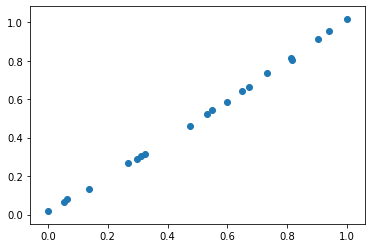

In [70]:
plt.scatter(Y,Y_pred)

## 2nd Part: What is the change in the corruption perception index for every one unit increase in Gini index?

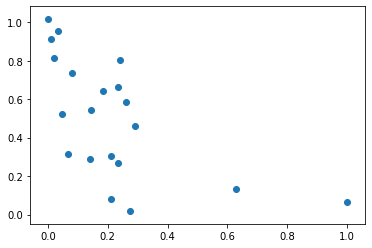

In [71]:
plt.scatter(x=X['Value'],y=Y_pred)

In [72]:
X['Value'] = X['Value']+1

In [73]:
#adding a constant variable
X_new = sm.add_constant(X)
lm1 = sm.OLS(Y,X_new).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CPI Score   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1606.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           6.97e-18
Time:                        23:10:56   Log-Likelihood:                 61.508
No. Observations:                  20   AIC:                            -109.0
Df Residuals:                      13   BIC:                            -102.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0195      0.031      0.626      0.542      -0.048       0.087
90% Confidence Interval (Higher bound)     0.4876      0.070      6.961      0.000       0.336       0.639
90% Confidence Interval (Lower bound)      0.4770      0.044     10.723      0.000       0.381       0.573
GI                                         0.0292      0.031      0.940      0.364      -0.038       0.096
PRS                                        0.0081      0.042      0.193      0.850      -0.082       0.099
WEF                                       -0.0025      0.023     -0.105      0.918      -0.053       0.048
Value                                     -0.0021      0.021     -0.099      0.923      -0.048       0.044
==============================================================================
Omnibus:                        4.274   Durbin-Watson:                   0.711
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.006
Skew:                          -0.472   Prob(JB):                        0.367
Kurtosis:                       1.769   Cond. No.                         54.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
Y_pred_new = lm.predict(X_new)

In [75]:
Y_pred_new

0     1.015281
1     0.952939
2     0.910874
3     0.802728
4     0.812184
5     0.734171
6     0.662269
7     0.638801
8     0.582777
9     0.541245
10    0.521172
11    0.457279
12    0.312910
13    0.303595
14    0.287912
15    0.266112
16    0.131633
17    0.081201
18    0.062034
19    0.015188
dtype: float64

In [76]:
residual = Y_pred_new-Y_pred
residual

0    -0.002126
1    -0.002126
2    -0.002126
3    -0.002126
4    -0.002126
5    -0.002126
6    -0.002126
7    -0.002126
8    -0.002126
9    -0.002126
10   -0.002126
11   -0.002126
12   -0.002126
13   -0.002126
14   -0.002126
15   -0.002126
16   -0.002126
17   -0.002126
18   -0.002126
19   -0.002126
dtype: float64

Thus, the change in CPI index with every 1 unit increase in Gini index = -0.002126